# Study of the phantom channels in Proto 1B system

**Idea 1:**
1. conduct runs with one active channel on each layer
    a. save the mean value of signal and std dev for each channel
2. use these saved values to get rid off the phantom signals

**Idea 2:**
1. conduct test runs to understand what causes the *fake* hit distributions

**Idea 3:**
1. use KDE fits with adjustable bandwidths to map histo data to discrete function
2. 
- good resources: 
    - https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html#scipy.stats.gaussian_kde
3. move on with ML routine using such schemes

In [28]:
from MuonDataFrame import *
file1 = "processed_data/events_data_frame_101.h5"
## with bricks
mdfo = MuonDataFrame(file1, isNew=False, d1="last") #Muon Data Frame Object 
mdf = mdfo.events_df

In [34]:
def getPD(term,df,bw):
    df[term].plot.kde(bw_method=bw)
    plt.title(term)
    plt.xlim([-0.25, 0.25])
    plt.show()

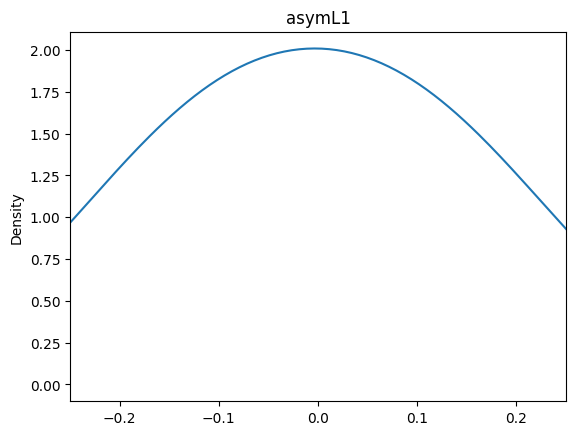

In [35]:
getPD("asymL1",mdf,1)

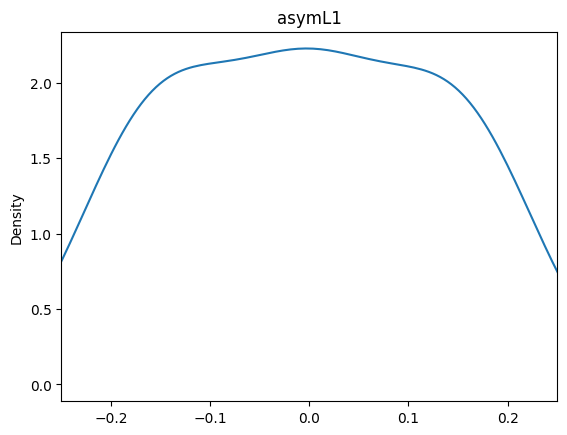

In [36]:
getPD("asymL1",mdf,0.5)

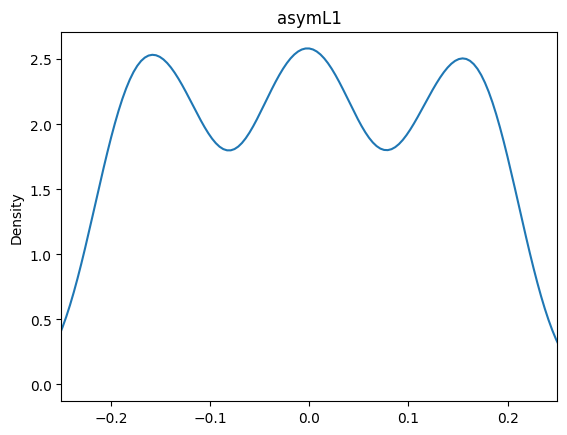

In [37]:
getPD("asymL1",mdf,0.25)

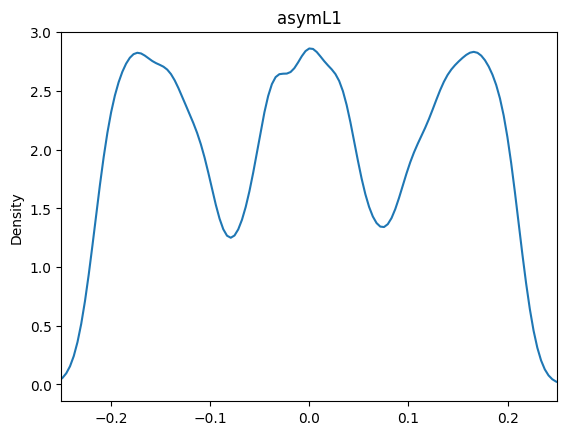

In [38]:
getPD("asymL1",mdf,0.125)

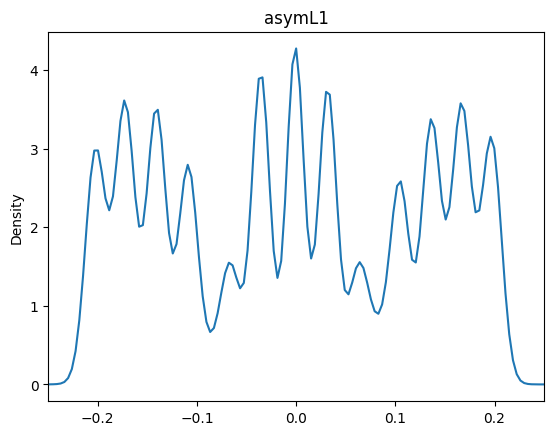

In [39]:
getPD("asymL1",mdf,0.0625)

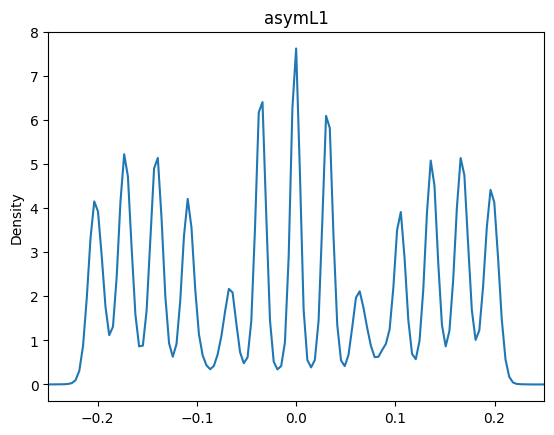

In [41]:
getPD("asymL1",mdf,0.03125)

At lower bandwidths, we see that we can do peak recognition fairly well that correspond to the unique channels. Note that we still see 13 channels and not 11.

## Peak Fitting

In [142]:
from scipy.signal import find_peaks, peak_prominences

In [198]:
def getHisto(term,df,bins,bw=0.01):
    df[term].plot.hist(bins=bins, density=True, range=[-0.25, 0.25])
    plt.title(term)
    plt.show()
    
def getNPHist(df, term, bins, range=(-0.25, 0.25)):
    values = df[term]
    hist, bin_edges = np.histogram(values, bins, range=range)
    bin_edges = bin_edges[1:]
    return hist, bin_edges


def getPeaks(x, prmc, wdth):
    peaks, properties = find_peaks(x, prominence=prmc, width=wdth)
    properties["prominences"], properties["widths"]

    plt.plot(x)
    plt.plot(peaks, x[peaks], "x")

    plt.vlines(x=peaks,
           ymin=x[peaks] - properties["prominences"],
           ymax=x[peaks],
           color="C1")

    plt.hlines(y=properties["width_heights"],
           xmin=properties["left_ips"],
           xmax=properties["right_ips"],
           color="C1")
    plt.show()

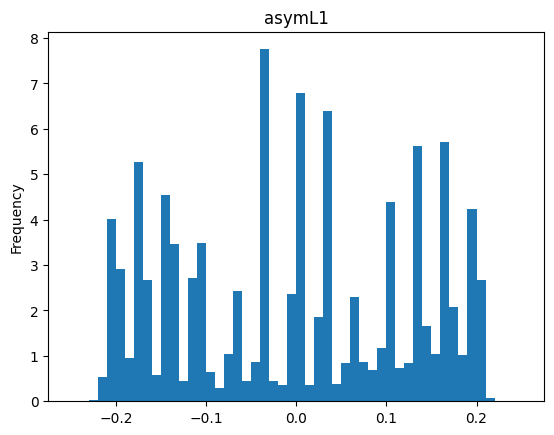

In [199]:
getHisto("asymL1",mdf,50)

In [200]:
values = mdf.asymL1
bins = 100
hist, bin_edges = np.histogram(values, bins, range=(-0.25,0.25))
bin_edges = bin_edges[1:]

peaks, properties = find_peaks(hist, height=1000)

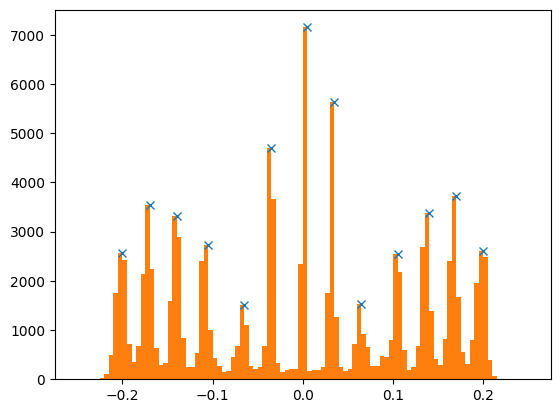

In [201]:
plt.plot(bin_edges[peaks], hist[peaks], "x")
plt.hist(values, bins=bins, range=(-0.25,0.25))
#plt.plot(bin_edges, hist)
plt.show()

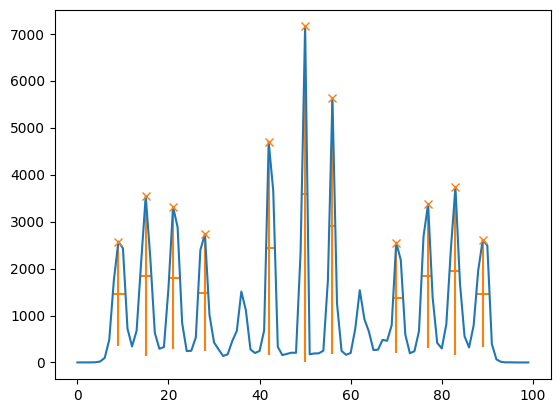

In [202]:
x = getNPHist(mdf, "asymL1", 100)[0]
getPeaks(x, 2000, 1)

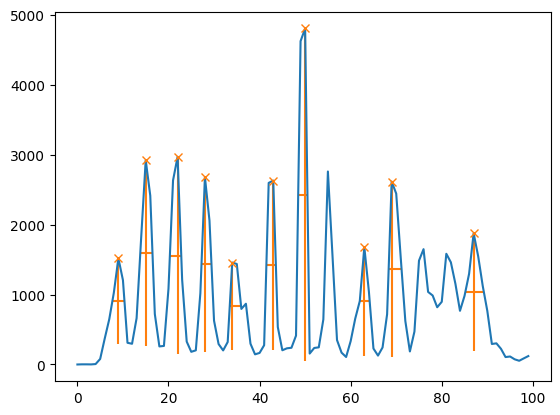

In [190]:
x = getNPHist(mdf, "asymL2", 100)[0]
getPeaks(x, 1000, 1)

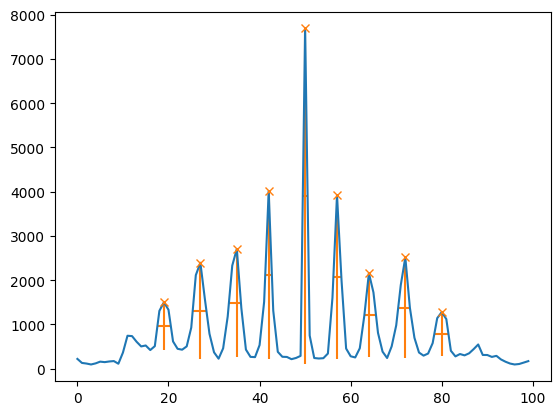

In [195]:
x = getNPHist(mdf, "asymL3", 100)[0]
getPeaks(x, 700, 1)

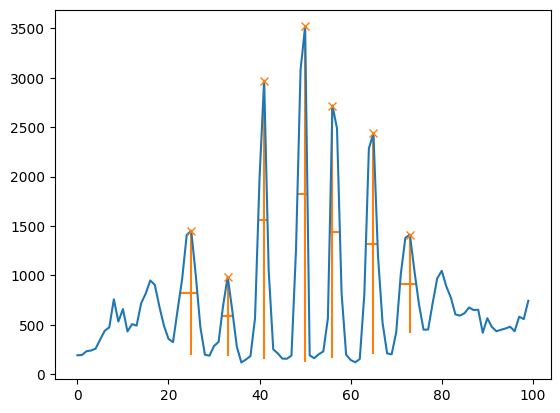

In [196]:
x = getNPHist(mdf, "asymL4", 100)[0]
getPeaks(x, 700, 1)